# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

612

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty city list
city_list = []

# Initialize values
set_count = 1 
record_count = 1

# Start the loop
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = url + "&q=" + city
    print(f'Processing record {record_count} of set {set_count} | {city}')
    
    record_count += 1
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the lat, lng, max temp, humidity, cloudiness, wind speed, country, date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humd = city_weather["main"]["humidity"]
        city_cloud = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_list.append({'City':city,
                          'Lat': city_lat, 
                          'Lng': city_lng,
                          'Max Temp': city_temp, 
                          'Humidity': city_humd,
                          'Cloudiness': city_cloud, 
                          'Wind Speed': city_wind, 
                          'Country': city_country,
                          'Date': city_date
        })
    except:
        print("City not found. Skipping...")
        pass
        
print('------------------------')
print('Data Retrieval Complete ')
print('------------------------')

Processing record 1 of set 1 | ginir
Processing record 2 of set 1 | hermanus
Processing record 3 of set 1 | vaini
Processing record 4 of set 1 | yumen
Processing record 5 of set 1 | marcona
City not found. Skipping...
Processing record 6 of set 1 | taolanaro
City not found. Skipping...
Processing record 7 of set 1 | diffa
Processing record 8 of set 1 | saskylakh
Processing record 9 of set 1 | ljig
Processing record 10 of set 1 | kapaa
Processing record 11 of set 1 | barrow
Processing record 12 of set 1 | anadyr
Processing record 13 of set 1 | busselton
Processing record 14 of set 1 | tabiauea
City not found. Skipping...
Processing record 15 of set 1 | new norfolk
Processing record 16 of set 1 | joshimath
Processing record 17 of set 1 | cape town
Processing record 18 of set 1 | raudeberg
Processing record 19 of set 1 | ribeira grande
Processing record 20 of set 1 | bambous virieux
Processing record 21 of set 1 | vertientes
Processing record 22 of set 1 | atuona
Processing record 23 of s

Processing record 37 of set 4 | peniche
Processing record 38 of set 4 | businga
Processing record 39 of set 4 | baruun-urt
Processing record 40 of set 4 | sinnamary
Processing record 41 of set 4 | cockburn town
Processing record 42 of set 4 | kiama
Processing record 43 of set 4 | cabo san lucas
Processing record 44 of set 4 | lavrentiya
Processing record 45 of set 4 | bahia blanca
Processing record 46 of set 4 | alekseyevsk
Processing record 47 of set 4 | otane
Processing record 48 of set 4 | san patricio
Processing record 49 of set 4 | bethel
Processing record 0 of set 5 | severo-kurilsk
Processing record 1 of set 5 | mkushi
Processing record 2 of set 5 | ahmadpur east
Processing record 3 of set 5 | djibo
Processing record 4 of set 5 | hokitika
Processing record 5 of set 5 | mys shmidta
City not found. Skipping...
Processing record 6 of set 5 | pathein
Processing record 7 of set 5 | luderitz
Processing record 8 of set 5 | diamond harbour
Processing record 9 of set 5 | arlit
Processing

Processing record 28 of set 8 | vao
Processing record 29 of set 8 | kerteh
City not found. Skipping...
Processing record 30 of set 8 | samarai
Processing record 31 of set 8 | chino valley
Processing record 32 of set 8 | independence
Processing record 33 of set 8 | leningradskiy
Processing record 34 of set 8 | talakan
Processing record 35 of set 8 | alice springs
Processing record 36 of set 8 | bogorodskoye
Processing record 37 of set 8 | maputo
Processing record 38 of set 8 | xianyang
Processing record 39 of set 8 | inongo
Processing record 40 of set 8 | burnie
Processing record 41 of set 8 | nhulunbuy
Processing record 42 of set 8 | shestakovo
Processing record 43 of set 8 | silopi
Processing record 44 of set 8 | yabassi
Processing record 45 of set 8 | deputatskiy
Processing record 46 of set 8 | sur
Processing record 47 of set 8 | mullaitivu
City not found. Skipping...
Processing record 48 of set 8 | kuche
City not found. Skipping...
Processing record 49 of set 8 | mitsamiouli
Process

Processing record 15 of set 12 | touros
Processing record 16 of set 12 | north bend
Processing record 17 of set 12 | kloulklubed
Processing record 18 of set 12 | hamilton
Processing record 19 of set 12 | coracao de maria
Processing record 20 of set 12 | alenquer
Processing record 21 of set 12 | lorengau
Processing record 22 of set 12 | mantua
Processing record 23 of set 12 | sumkino
Processing record 24 of set 12 | talara
Processing record 25 of set 12 | panjab
Processing record 26 of set 12 | lalibela
Processing record 27 of set 12 | aklavik
Processing record 28 of set 12 | kismayo
Processing record 29 of set 12 | preston
Processing record 30 of set 12 | martinsville
Processing record 31 of set 12 | konakovo
Processing record 32 of set 12 | conceicao do mato dentro
Processing record 33 of set 12 | beloha
Processing record 34 of set 12 | chadiza
Processing record 35 of set 12 | tamandare
Processing record 36 of set 12 | sao joao da barra
Processing record 37 of set 12 | yerbogachen
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_list_df = pd.DataFrame(city_list)
city_list_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ginir,7.1333,40.7000,65.01,47,97,5.82,ET,1610349778
1,hermanus,-34.4187,19.2345,72.00,69,3,7.00,ZA,1610349779
2,vaini,-21.2000,-175.2000,78.80,89,75,4.61,TO,1610349691
3,yumen,40.2833,97.2000,26.13,59,0,34.25,CN,1610349779
4,diffa,13.3154,12.6113,69.10,35,0,11.90,NE,1610349780
5,saskylakh,71.9167,114.0833,-8.86,88,100,14.67,RU,1610349780
6,ljig,44.2301,20.2382,30.20,100,75,4.05,RS,1610349781
7,kapaa,22.0752,-159.3190,75.20,78,40,10.36,US,1610349781
8,barrow,71.2906,-156.7887,3.20,78,90,14.97,US,1610349736
9,anadyr,64.7500,177.4833,-31.00,68,0,6.71,RU,1610349781


In [8]:
city_list_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.050097,21.447155,49.653204,73.552212,54.697345,8.062690,1.610350e+09
std,33.657105,88.432928,31.989493,20.667827,41.086987,5.830383,7.423968e+01
min,-54.800000,-179.166700,-41.490000,9.000000,0.000000,0.110000,1.610350e+09
25%,-10.454400,-52.950000,28.400000,67.000000,1.000000,3.760000,1.610350e+09
50%,22.566700,25.570100,59.320000,80.000000,75.000000,6.710000,1.610350e+09
75%,47.260000,96.166700,75.940000,88.000000,94.000000,11.180000,1.610350e+09
max,78.218600,178.416700,102.200000,100.000000,100.000000,34.250000,1.610350e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
city_high_humid = city_list_df[city_list_df['Humidity'] > 100].index
city_high_humid

Int64Index([], dtype='int64')

In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_list_df.drop(city_high_humid, inplace=False)
clean_city_data.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ginir,7.1333,40.7000,65.01,47,97,5.82,ET,1610349778
1,hermanus,-34.4187,19.2345,72.00,69,3,7.00,ZA,1610349779
2,vaini,-21.2000,-175.2000,78.80,89,75,4.61,TO,1610349691
3,yumen,40.2833,97.2000,26.13,59,0,34.25,CN,1610349779
4,diffa,13.3154,12.6113,69.10,35,0,11.90,NE,1610349780
5,saskylakh,71.9167,114.0833,-8.86,88,100,14.67,RU,1610349780
6,ljig,44.2301,20.2382,30.20,100,75,4.05,RS,1610349781
7,kapaa,22.0752,-159.3190,75.20,78,40,10.36,US,1610349781
8,barrow,71.2906,-156.7887,3.20,78,90,14.97,US,1610349736
9,anadyr,64.7500,177.4833,-31.00,68,0,6.71,RU,1610349781


In [11]:
clean_city_data.to_csv('clean city data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

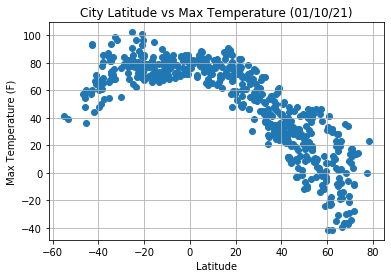

In [12]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.title('City Latitude vs Max Temperature (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('output_data/figure1.png')
plt.show()

## Latitude vs. Humidity Plot

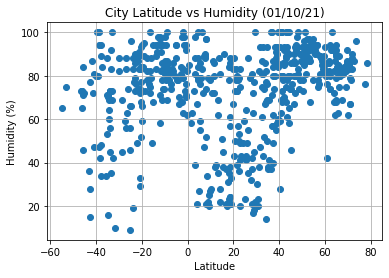

In [13]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title('City Latitude vs Humidity (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('output_data/figure2.png')
plt.show()

## Latitude vs. Cloudiness Plot

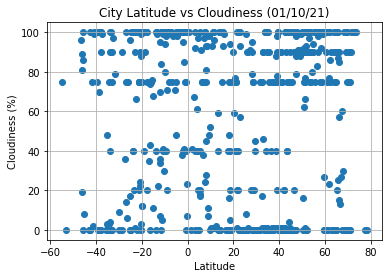

In [14]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.title('City Latitude vs Cloudiness (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('output_data/figure3.png')
plt.show()

## Latitude vs. Wind Speed Plot

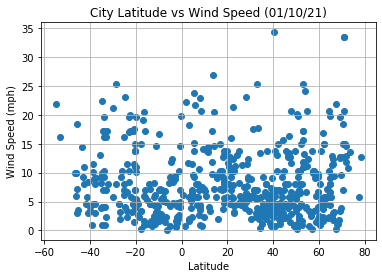

In [15]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.title('City Latitude vs Wind Speed (%s)' % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('output_data/figure4.png')
plt.show()

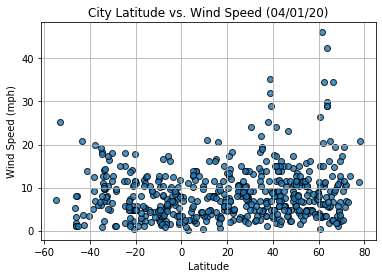

## Linear Regression

The r-value is: 0.6249586076163857


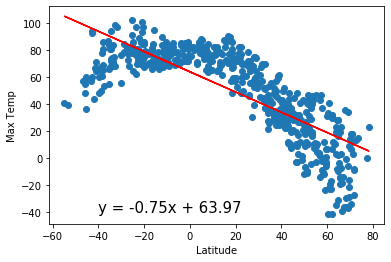

In [44]:
# y = ax + b (R2: the percentage of the data are explained by the function)
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (-40,-40), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure5.png')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


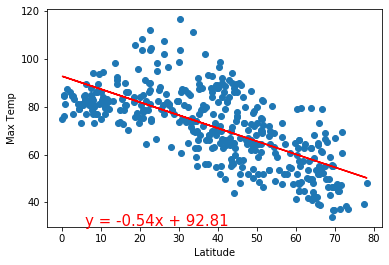

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x = clean_city_data['City']
y = clean_city_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x('southern hemisphere'), y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (0,50), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure6.png')
plt.show()

The r-value is: 0.6082708688906918


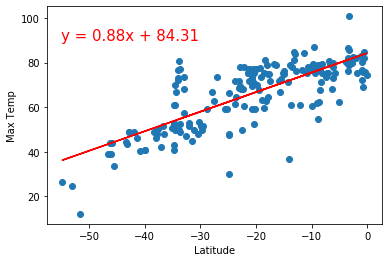

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x = clean_city_data['City']
y = clean_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x('northern hemisphere'), y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (0,50), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.savefig('output_data/figure7.png')
plt.show()

The r-value is: 0.000543987878808455


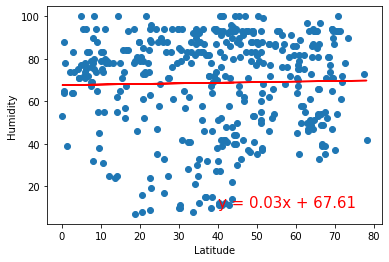

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


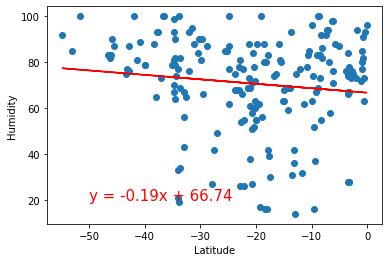

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


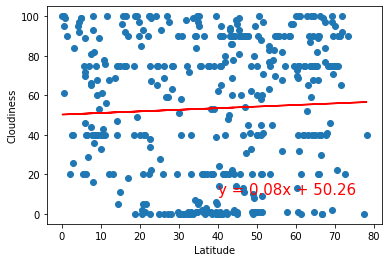

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


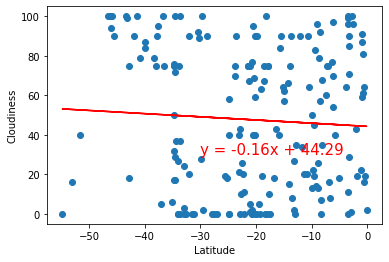

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


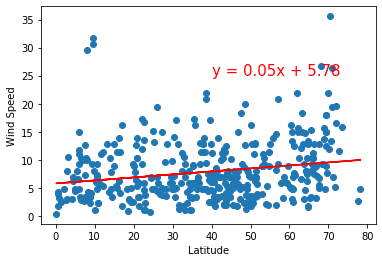

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


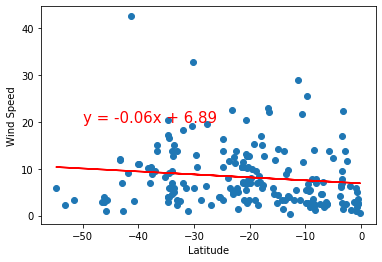